In [43]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [44]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

dataset_dir = keras.utils.get_file(fname = 'flower_photos' , origin = dataset_url , cache_dir='.',untar=True)

In [45]:
import pathlib

datadir = pathlib.Path(dataset_dir)
datadir

WindowsPath('datasets/flower_photos')

In [46]:
flowers = {'daisy' : list(datadir.glob("daisy/*")),
'dandelion' : list(datadir.glob("dandelion/*")),
'roses' : list(datadir.glob("roses/*")),
'sunflowers' : list(datadir.glob("sunflowers/*")),
'tulips' : list(datadir.glob("tulips/*"))}

lables = {
    'daisy' : 0 ,
    'dandelion' : 1 ,
    'roses' : 2,
    'sunflowers' : 3 ,
    'tulips' :4
}

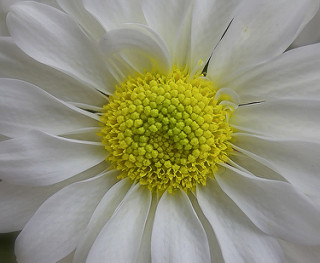

In [47]:
PIL.Image.open(str(flowers['daisy'][0]))

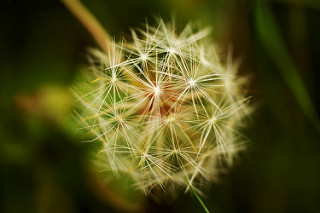

In [48]:
PIL.Image.open(str(flowers['dandelion'][0]))

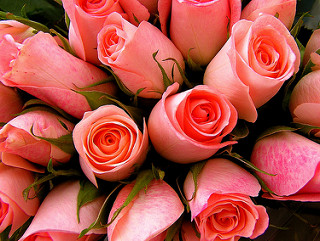

In [50]:
PIL.Image.open(str(flowers['roses'][8]))

In [51]:
x =[]
y = []

for image_name , image in flowers.items():
  for img in image :
    img = cv2.imread(str(img)) # converts image form its dir to np array to represent image
    resized = cv2.resize(img , (224,224))
    x.append(resized)
    y.append(lables[image_name])

In [52]:
x = np.array(x)
y = np.array(y)

In [53]:
x_train , x_test , y_train , y_test  = train_test_split(x,y , test_size=.2 , stratify = y)

In [54]:
# scalin data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [55]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (224,224,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [56]:
model = keras.models.Sequential([

    data_augmentation,

    keras.layers.Conv2D(filters = 16,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 128,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(5,activation = 'softmax')
])

NameError: name 'data_augmentation' is not defined